In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import pathlib

In [3]:
data_dir = pathlib.Path('./Bone_Fracture_Detection/archive/BoneFractureYolo8')

In [4]:
train_image_path = pathlib.Path(data_dir/'train/images')
train_label_path = pathlib.Path(data_dir/'train/labels')

In [5]:
test_image_path = pathlib.Path(data_dir/'test/images')
test_label_path = pathlib.Path(data_dir/'test/labels')

In [41]:
print(train_image_path)

Bone_Fracture_Detection\archive\BoneFractureYolo8\train\images


In [42]:
def get_sorted_files(image_dir, label_dir):


    train_image_path = Path(image_dir)
    train_label_path = Path(label_dir)

    test_image_path = Path(image_dir)
    test_label_path = Path(label_dir)
    

    image_files = sorted(train_image_path.glob('*.jpg'))
    label_files = sorted(train_label_path.glob('*.txt'))


    

    

    return image_files, label_files


In [43]:
def get_label(file_path):

    with open(file_path, 'r') as file:
        label_content = file.readline().strip()
        if not label_content:  
            return None
        return int(label_content[0])

In [44]:
image_dir = './Bone_Fracture_Detection/archive/BoneFractureYolo8/train/images'
label_dir = './Bone_Fracture_Detection/archive/BoneFractureYolo8/train/labels'

In [45]:
image_files, label_files = get_sorted_files(image_dir, label_dir)

In [46]:
images = []
labels = []
IMG_SIZE = 256


In [47]:
for image_file, label_file in zip(image_files, label_files):

    image_path = str(image_file)
    label_path = str(label_file)
    

    label = get_label(label_path)
    if label is None:  
        continue
    
    
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    images.append(image)
    
    
    labels.append(label)

In [48]:
images = np.array(images)
labels = np.array(labels)

print(f'Loaded {len(images)} images and {len(labels)} labels.')

Loaded 0 images and 0 labels.


In [49]:
from tensorflow.keras.utils import to_categorical
label_mapping = {0: 0, 1: 1, 2: 2, 4: 3, 5: 4, 6: 5}

labels_mapped = np.array([label_mapping[label] for label in labels])
labels_one_hot = to_categorical(labels_mapped, num_classes=6)

df_labels = pd.DataFrame(labels_one_hot, columns=[f'Class_{i}' for i in range(6)])

class_counts = df_labels.sum()

print("Class counts:")
print(class_counts)

Class counts:
Class_0    0.0
Class_1    0.0
Class_2    0.0
Class_3    0.0
Class_4    0.0
Class_5    0.0
dtype: float64


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels_mapped, test_size=0.2, stratify=labels_mapped)

In [19]:
print(X_train[0].shape)

(256, 256, 3)


In [20]:
import matplotlib.backends.backend_agg

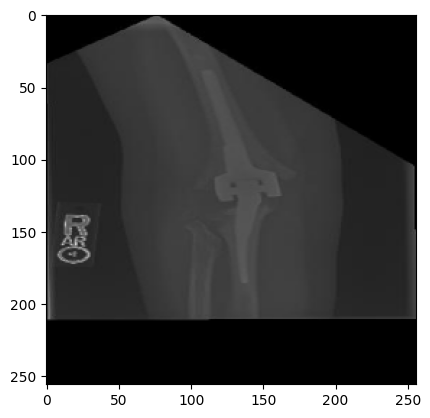

In [28]:
import matplotlib.pyplot as plt
from matplotlib.backends import backend_agg
# Assuming X_train is your image array
plt.imshow(X_train[1])
plt.show()

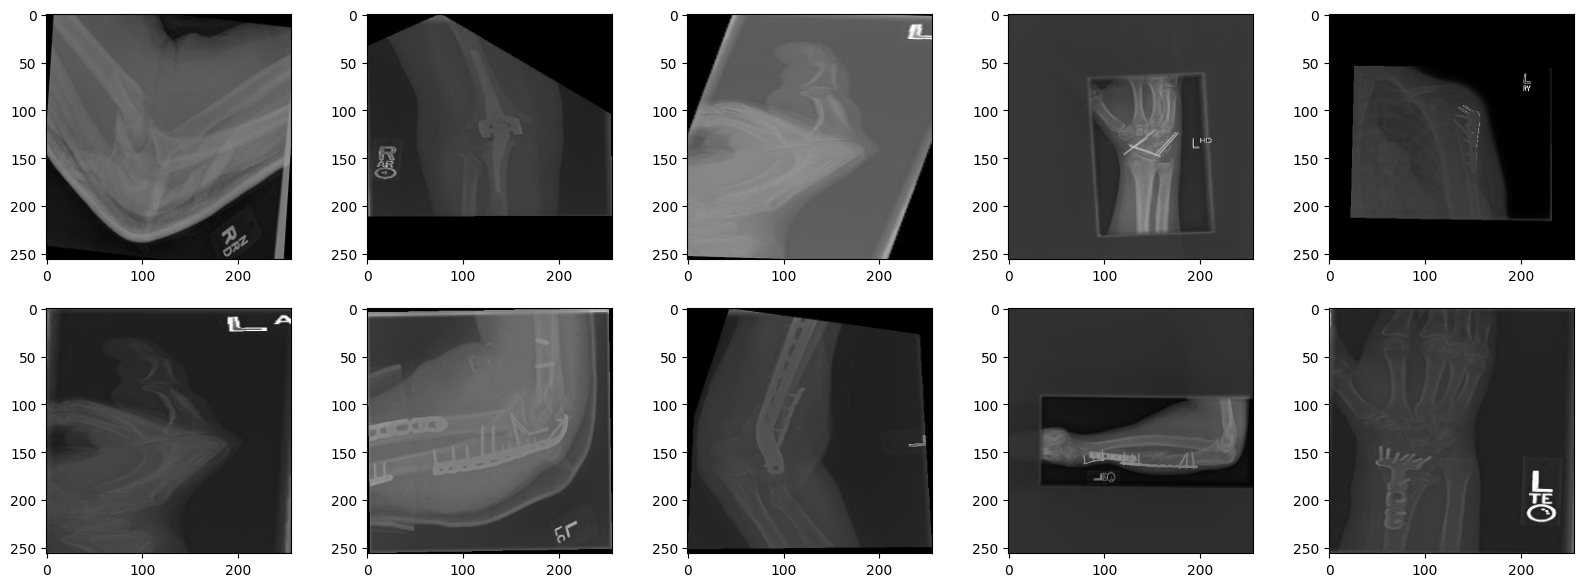

In [47]:
plt.figure(figsize=(20, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
plt.show()

In [22]:
len(X_train)

1443

In [23]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=6)
y_val_one_hot = to_categorical(y_val, num_classes=6)

BATCH_SIZE = 32 


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow(X_train, y_train_one_hot, batch_size=BATCH_SIZE, shuffle=True)
validation_data = datagen.flow(X_val, y_val_one_hot, batch_size=BATCH_SIZE)

print("Training set size:", len(train_data))
print("Validation set size:", len(validation_data))

print("One-hot encoded y_train shape:", y_train_one_hot.shape)
print("One-hot encoded y_val shape:", y_val_one_hot.shape)

Training set size: 46
Validation set size: 12
One-hot encoded y_train shape: (1443, 6)
One-hot encoded y_val shape: (361, 6)


In [ ]:
# model = keras.models.Sequential([
#     keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
#     keras.layers.Conv2D(32, 3, activation='relu'),
#     keras.layers.Conv2D(64, 3, activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Conv2D(128, 3, activation='relu'),
#     keras.layers.MaxPool2D(),
#     keras.layers.Flatten(),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(6, activation='softmax')
# ])

# model.summary()

In [ ]:
# model.compile(
#     loss=keras.losses.CategoricalCrossentropy(from_logits=False),
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy']
# )

In [ ]:
# model.fit(
#     train_data,
#     validation_data=validation_data,
#     epochs=10
# )

In [24]:
#to solve the overfitting increase the dropout to 0.6 and using regularizers and make the learning rate =0.0005

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

model = keras.models.Sequential([
    keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(128, 3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(6, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 252, 252, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 492032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 492032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │       2,952,198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,045,446 (11.62 MB)

 Trainable params: 3,045,446 (11.62 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.2094 - loss: 2.9912 - val_accuracy: 0.3186 - val_loss: 2.3154
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 0.4528 - loss: 2.0982 - val_accuracy: 0.4432 - val_loss: 1.9153
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.6528 - loss: 1.4828 - val_accuracy: 0.5540 - val_loss: 1.6722
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 172s 4s/step - accuracy: 0.7965 - loss: 1.0450 - val_accuracy: 0.6011 - val_loss: 1.6408
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.9136 - loss: 0.6927 - val_accuracy: 0.6177 - val_loss: 1.7925
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.9631 - loss: 0.5047 - val_accuracy: 0.6288 - val_loss: 1.8808
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9879 - loss: 0.3907 - val_accuracy: 0.6454 - val_loss: 1.9368


# Bone Detetion Model Conclution

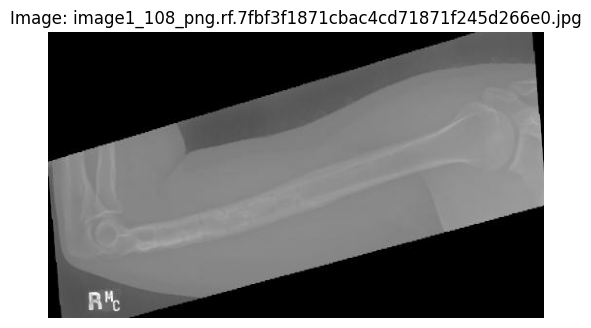

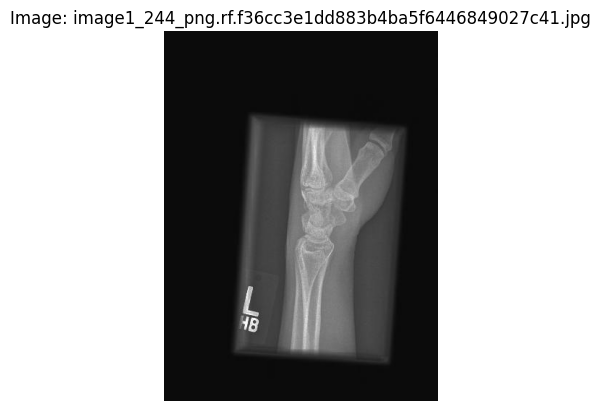

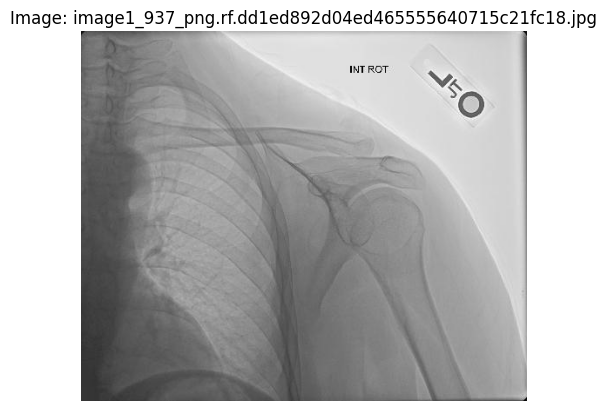

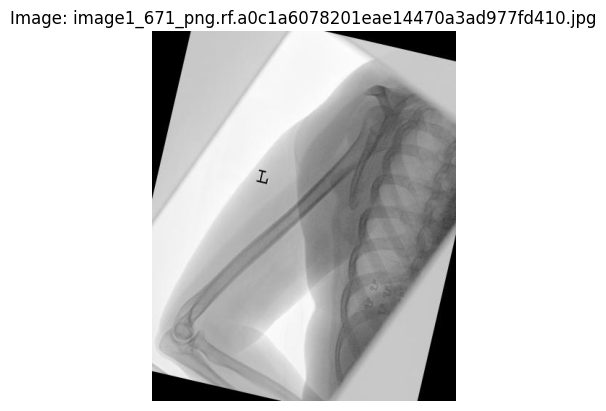

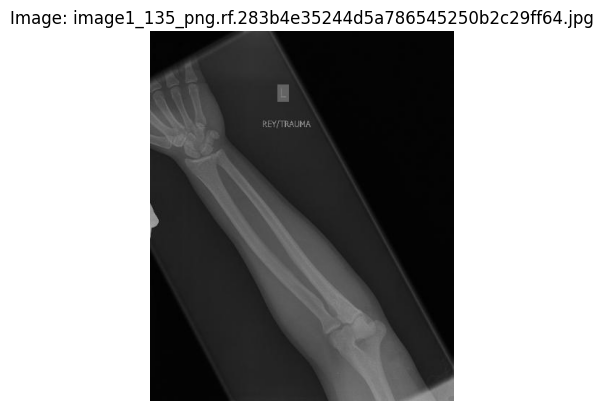

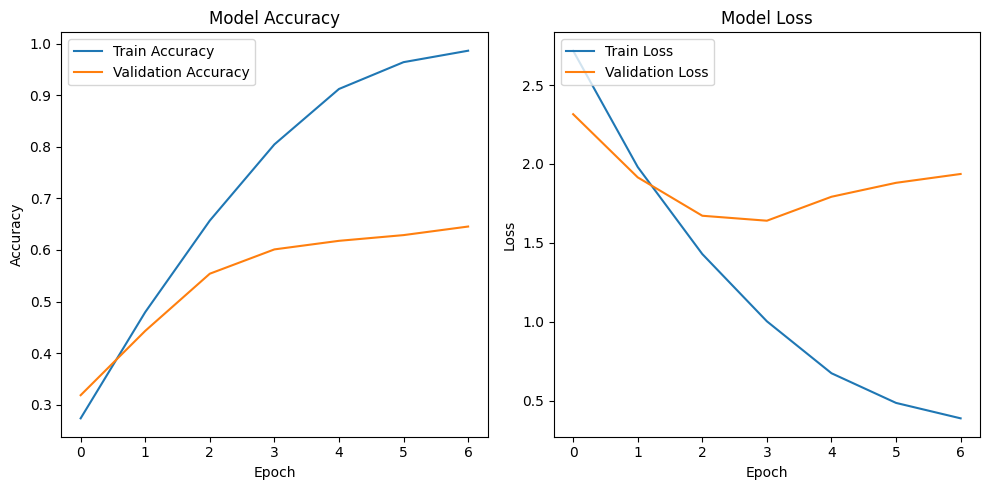

In [51]:
import random

# Function to parse bounding box information from the label file
def get_bounding_boxes(file_path):
    with open(file_path, 'r') as file:
        boxes = []
        for line in file.readlines():
            if line.strip():
                values = line.strip().split(' ')
                class_id = int(values[0])
                x_center, y_center, width, height = map(float, values[1:])
                boxes.append((class_id, x_center, y_center, width, height))
        return boxes

# Function to draw bounding boxes on an image
def draw_bounding_box(image, boxes):
    img_h, img_w = image.shape[:2]
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        # Convert from YOLO format to pixel coordinates
        x_min = int((x_center - width / 2) * img_w)
        y_min = int((y_center - height / 2) * img_h)
        x_max = int((x_center + width / 2) * img_w)
        y_max = int((y_center + height / 2) * img_h)
        
        # Draw the bounding box on the image
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    return image

# Select some random images and draw their bounding boxes
def display_random_images_with_boxes(image_files, label_files, num_images=5):
    random_indices = random.sample(range(len(image_files)), num_images)
    for idx in random_indices:
        img_path = image_files[idx]
        lbl_path = label_files[idx]

        image = cv2.imread(str(img_path))
        boxes = get_bounding_boxes(str(lbl_path))

        image_with_boxes = draw_bounding_box(image, boxes)
        plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {img_path.name}')
        plt.axis('off')
        plt.show()

# Call the function to display random images with bounding boxes
display_random_images_with_boxes(image_files, label_files)

# Display the model accuracy after training
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)


In [63]:
import random
import cv2
import matplotlib.pyplot as plt

# Function to parse bounding box information from the label file
def get_bounding_boxes(file_path):
    with open(file_path, 'r') as file:
        boxes = []
        for line in file.readlines():
            values = line.strip().split()
            class_id = int(values[0])  # The class is the first value
            x_center, y_center, width, height = map(float, values[1:])
            boxes.append((class_id, x_center, y_center, width, height))
        return boxes

# Function to draw bounding boxes on an image
def draw_bounding_box(image, boxes):
    img_h, img_w = image.shape[:2]  # Get image height and width
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        
        # Convert from YOLO normalized format to actual pixel coordinates
        x_min = int((x_center - width / 2) * img_w)
        y_min = int((y_center - height / 2) * img_h)
        x_max = int((x_center + width / 2) * img_w)
        y_max = int((y_center + height / 2) * img_h)
        
        # Draw the bounding box on the image (red color with thickness 2)
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        
        # Optionally, add the class label
        label_text = f'Class: {class_id}'
        cv2.putText(image, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        
    return image

# Select some random images and draw their bounding boxes
def display_random_images_with_boxes(image_files, label_files, num_images=5):
    random_indices = random.sample(range(len(image_files)), num_images)  # Pick random image indices
    for idx in random_indices:
        img_path = image_files[idx]
        lbl_path = label_files[idx]

        image = cv2.imread(str(img_path))  # Load image
        boxes = get_bounding_boxes(str(lbl_path))  # Load bounding boxes from label file

        if boxes:
            image_with_boxes = draw_bounding_box(image, boxes)  # Draw boxes on the image

            # Convert BGR (OpenCV default) to RGB for matplotlib display
            plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
            plt.title(f'Image: {img_path.name}')
            plt.axis('off')
            plt.show()
        else:
            print(f"No bounding boxes found for {img_path.name}")

# Call the function to display random images with bounding boxes
display_random_images_with_boxes(image_files, label_files, num_images=5)


No bounding boxes found for image1_546_png.rf.b92962f0179506f1efcfedcf3fd124ad.jpg
No bounding boxes found for image1_140_png.rf.7ac5ad2364e136116d56a9a9081d43c1.jpg
No bounding boxes found for image1_68_png.rf.60970c5e5b05495c1d0d4950a95d576f.jpg
No bounding boxes found for image1_400_png.rf.9f1e677155fcb5e6deae18ec39c61893.jpg
No bounding boxes found for image1_322_png.rf.506520a5448c14a595aa8b00bb1eca97.jpg
